In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()

In [ ]:
start = '2016-01-01'
end = '2021-01-01'

In [ ]:
AAPL = web.get_data_yahoo('AAPL', start=start, end=end)
AAPL

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.323219,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.713696,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.249626,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.268383,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.386133,283192000
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.549637,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.254608,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.440399,121047300


In [ ]:
price = AAPL['Adj Close']

In [ ]:
ret = price.pct_change()

In [ ]:
weekly_price = price.asfreq('W-FRI')

In [ ]:
weekly_ret = weekly_price.pct_change()

In [ ]:
weekly_ret

Date
2016-01-08         NaN
2016-01-15    0.001753
2016-01-22    0.044168
2016-01-29   -0.040229
2016-02-05   -0.028866
                ...   
2020-11-27   -0.006392
2020-12-04    0.048546
2020-12-11    0.001309
2020-12-18    0.034719
2020-12-25    0.000000
Freq: W-FRI, Name: Adj Close, Length: 260, dtype: float64

In [ ]:
vol_d = ret.std()*np.sqrt(252)
vol_d

0.30176555272105454

In [ ]:
vol_w = weekly_ret.std()*np.sqrt(52) 
vol_w

0.28622183260926415

3M Volatility (Annualized from Daily)

In [ ]:
vol_d_rolling = ret.rolling(window=60).std()*np.sqrt(252)
vol_d_rolling

Date
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
                ...   
2020-12-24    0.346105
2020-12-28    0.352596
2020-12-29    0.346606
2020-12-30    0.342587
2020-12-31    0.337074
Name: Adj Close, Length: 1259, dtype: float64

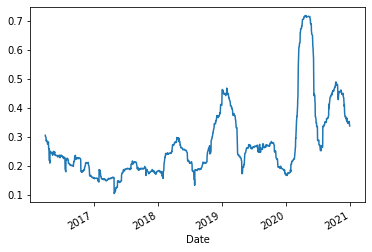

In [ ]:
vol_d_rolling.plot()

3M Volatility (Annualized from Weekly)

In [ ]:
vol_w_rolling = weekly_ret.rolling(window=12).std()*np.sqrt(52)
vol_w_rolling

Date
2016-01-08         NaN
2016-01-15         NaN
2016-01-22         NaN
2016-01-29         NaN
2016-02-05         NaN
                ...   
2020-11-27    0.340704
2020-12-04    0.312353
2020-12-11    0.287974
2020-12-18    0.279547
2020-12-25    0.280364
Freq: W-FRI, Name: Adj Close, Length: 260, dtype: float64

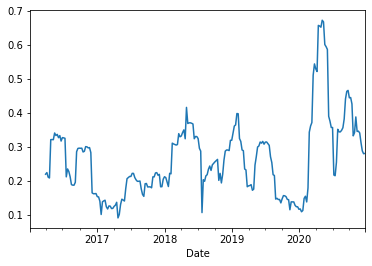

In [ ]:
vol_w_rolling.plot()

ลองทำ เป็น Monthly ดูนะครับ  เปลี่ยนเป็น 12